### Import packages

In [10]:
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

### Specify images file paths

In [2]:
# Assign training and validation set directories
base_dir = 'C:\\Users\\Tomi\\Documents\\web_scrape\\bicycles_or_motorcycles'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training bicycles pictures
train_bicycles_dir = os.path.join(train_dir, 'bicycles')

# Directory with training motorcycles pictures
train_motorcycles_dir = os.path.join(train_dir, 'motorcycles')

# Directory with validation bicycles pictures
validation_bicycles_dir = os.path.join(validation_dir, 'bicycles')

# Directory with validation motorcycles pictures
validation_motorcycles_dir = os.path.join(validation_dir, 'motorcycles')

### View images in the dataset

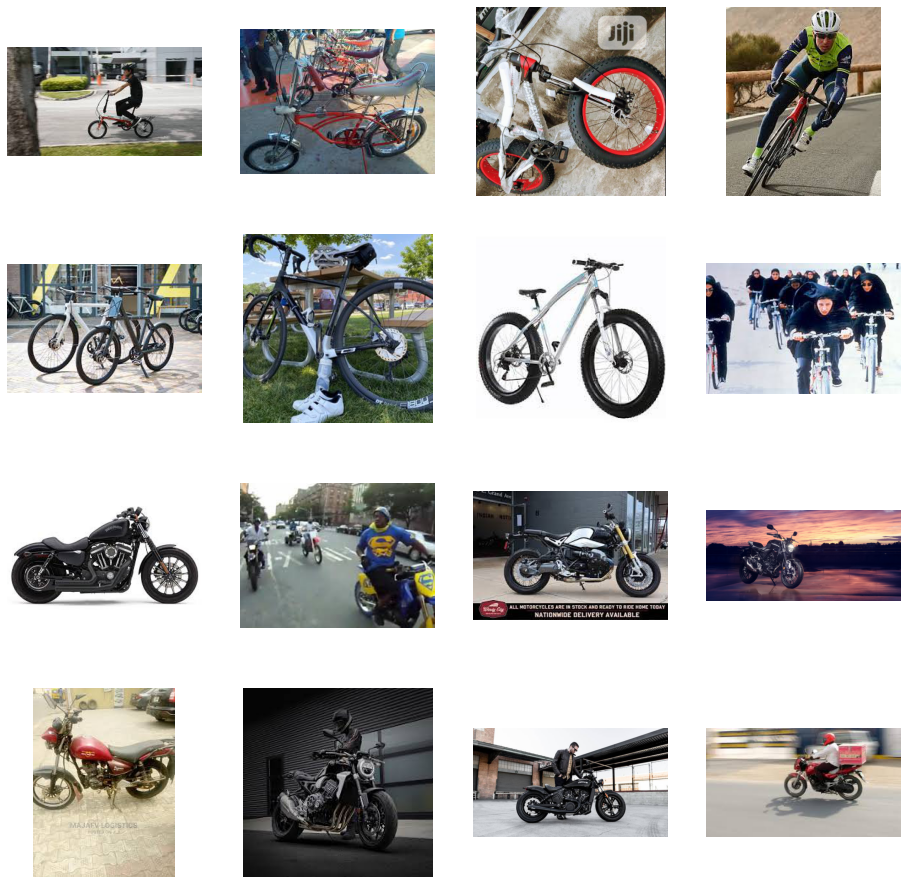

In [3]:
# Output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

#display a batch of 8 bicycle and 8 motorcycle picture

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

train_bicycle_fnames = os.listdir( train_bicycles_dir )
train_motorcycle_fnames = os.listdir( train_motorcycles_dir )

next_bicycle_pix = [os.path.join(train_bicycles_dir, fname) 
                    for fname in train_bicycle_fnames[pic_index-8:pic_index] 
                   ]

next_motorcycle_pix = [os.path.join(train_motorcycles_dir, fname) 
                       for fname in train_motorcycle_fnames[pic_index-8:pic_index]
                      ]

for i, img_path in enumerate(next_bicycle_pix+next_motorcycle_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Define model

In [4]:
def create_model():
    '''Creates a CNN with 4 convolutional layers'''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])
    return model

model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Define plot function

In [5]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

## Modelling

### Import and augment images

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=140,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


### Instantiate and train the model

In [7]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model_with_aug = create_model()

# Train the new model
history_with_aug = model_with_aug.fit(
    train_generator,  
    steps_per_epoch=10,  # 1400 training images = batch_size * steps
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=6,  # 600 validation images = batch_size * steps
    verbose=2)

Epoch 1/20
10/10 - 140s - loss: 0.7027 - accuracy: 0.5150 - val_loss: 0.6772 - val_accuracy: 0.5450 - 140s/epoch - 14s/step
Epoch 2/20
10/10 - 121s - loss: 0.6754 - accuracy: 0.6121 - val_loss: 0.6458 - val_accuracy: 0.6967 - 121s/epoch - 12s/step
Epoch 3/20
10/10 - 119s - loss: 0.6538 - accuracy: 0.6079 - val_loss: 0.6165 - val_accuracy: 0.7067 - 119s/epoch - 12s/step
Epoch 4/20
10/10 - 131s - loss: 0.6341 - accuracy: 0.6329 - val_loss: 0.6105 - val_accuracy: 0.6633 - 131s/epoch - 13s/step
Epoch 5/20
10/10 - 131s - loss: 0.6359 - accuracy: 0.6600 - val_loss: 0.5990 - val_accuracy: 0.6800 - 131s/epoch - 13s/step
Epoch 6/20
10/10 - 131s - loss: 0.6015 - accuracy: 0.6793 - val_loss: 0.5836 - val_accuracy: 0.6817 - 131s/epoch - 13s/step
Epoch 7/20
10/10 - 129s - loss: 0.6120 - accuracy: 0.6757 - val_loss: 0.5835 - val_accuracy: 0.6967 - 129s/epoch - 13s/step
Epoch 8/20
10/10 - 131s - loss: 0.5943 - accuracy: 0.6814 - val_loss: 0.5759 - val_accuracy: 0.7017 - 131s/epoch - 13s/step
Epoch 9/

## Error analysis

### Plot training results

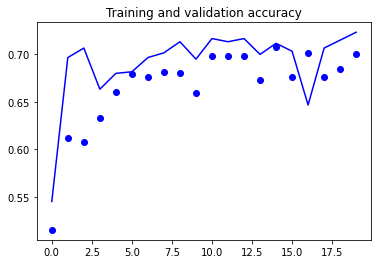

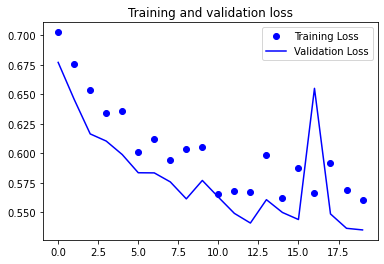

In [8]:
plot_loss_acc(history_with_aug)

### Run prediction on unseen data

In [13]:
# predicting images
path= 'C:\\Users\\Tomi\\Downloads\\police_bicycle.jpeg'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
new_image = np.vstack([x])

img_class = model_with_aug.predict(new_image)
  
print(img_class[0])

if img_class>0.5:
    print("This is a motorcycle") 
else:
    print("This is a bicycle")

[0.71369064]
This is a motorcycle


### Visualise convolution features

C:\Users\Tomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


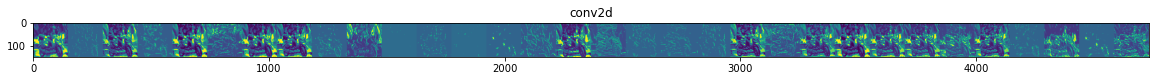

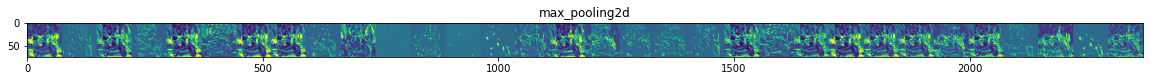

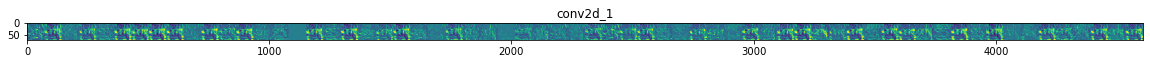

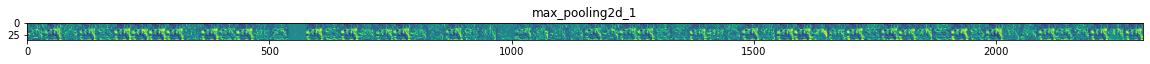

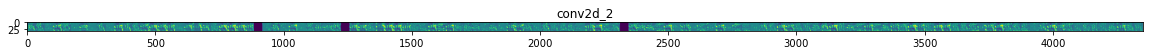

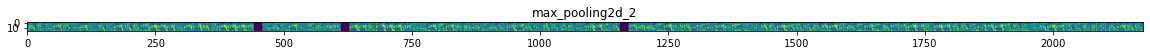

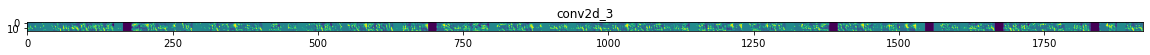

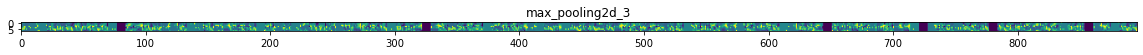

In [16]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model_with_aug.layers]
visualization_model = tf.keras.models.Model(inputs = model_with_aug.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
bicycle_img_files = [os.path.join(train_bicycles_dir, f) for f in train_bicycle_fnames]
motorcycle_img_files = [os.path.join(train_motorcycles_dir, f) for f in train_motorcycle_fnames]
img_path = random.choice(bicycle_img_files + motorcycle_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

# Numpy array with shape (150, 150, 3)
x = img_to_array(img)

# Numpy array with shape (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))

        # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Save model

In [17]:
model.save("bvm_model")

INFO:tensorflow:Assets written to: bvm_model\assets
